UCI ML Breast Cancer Wisconsin (Diagnostic) datasets-Breast Cancer dataset Scikit -EDA and Predictive Modelling (SVM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Import the dataset

In [5]:
BCskl=datasets.load_breast_cancer()

Checking the data details

In [28]:
BCskl.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
print(BCskl ['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [20]:
dataset_features=pd.DataFrame(BCskl['data'],columns=BCskl['feature_names'])

In [22]:
dataset_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [26]:
BCskl['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [33]:
dataset_label=pd.DataFrame(BCskl['target'],columns=['Cancer Benign?'])

In [35]:
dataset_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
Cancer Benign?    569 non-null int32
dtypes: int32(1)
memory usage: 2.3 KB


Exploratory data analysis

In [36]:
Cd=dataset_features.join(dataset_label)

In [38]:
Cd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer Benign?
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


plotting worst Concave Points vs Concavity

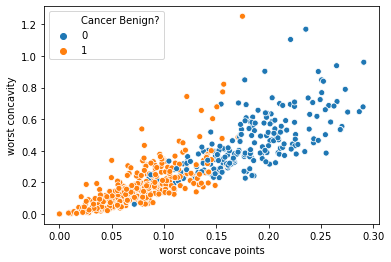

In [40]:
sns.scatterplot(x='worst concave points',y='worst concavity',data=Cd,hue='Cancer Benign?')

plotting mean symmetry vs mean fractal dimension 

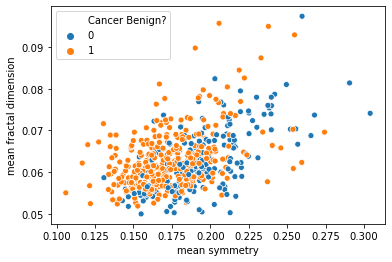

In [41]:
sns.scatterplot(x='mean symmetry',y='mean fractal dimension',data=Cd,hue='Cancer Benign?')

plotting worst symmetry vs mean fractal dimension 

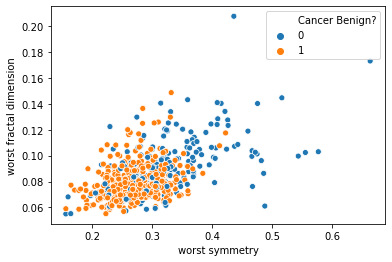

In [43]:
sns.scatterplot(x='worst symmetry',y='worst fractal dimension',data=Cd,hue='Cancer Benign?')

plotting mean perimeter vs  worst perimeter

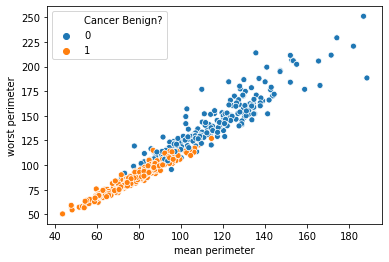

In [44]:
sns.scatterplot(x='mean perimeter',y='worst perimeter',data=Cd,hue='Cancer Benign?')

We can see that as the mean and worst parameters increases there is clear change of the cancer being malignant